Optimizasyon Başlıyor... (Senaryo 0)

Nesil 0: En İyi Skor = 22.0518 | x1: 5.40, x2: 1.51
Nesil 10: En İyi Skor = 24.0000 | x1: 6.00, x2: 1.80
Nesil 20: En İyi Skor = 24.0000 | x1: 6.00, x2: 1.86
Nesil 30: En İyi Skor = 24.0000 | x1: 6.00, x2: 1.75
Nesil 40: En İyi Skor = 24.0000 | x1: 6.00, x2: 1.78
Nesil 50: En İyi Skor = 24.0000 | x1: 6.00, x2: 1.74
Nesil 60: En İyi Skor = 24.0000 | x1: 6.00, x2: 1.85
Nesil 70: En İyi Skor = 24.0000 | x1: 6.00, x2: 1.71
Nesil 80: En İyi Skor = 24.0000 | x1: 6.00, x2: 1.78
Nesil 90: En İyi Skor = 24.0000 | x1: 6.00, x2: 1.93

--- OPTİMİZASYON TAMAMLANDI ---
En İyi Çözüm (x1 - Raf Yüksekliği): 6.0000 m
En İyi Çözüm (x2 - Raf Derinliği) : 1.7935 m
Maksimum Depo Verim Puanı (y)     : 24.0000
Toplam Yükseklik (Kısıt Kontrolü) : 7.79 m (<= 8 olmalı)


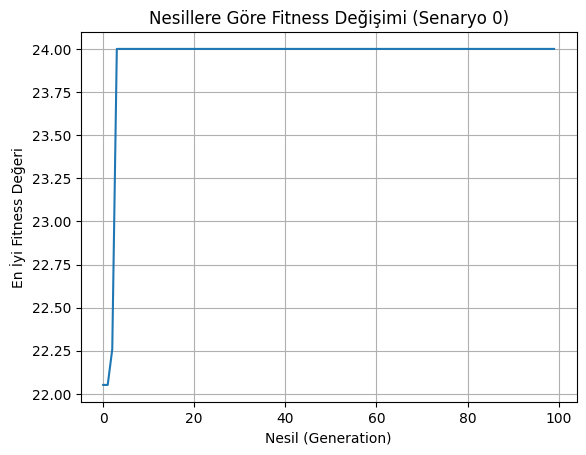

In [2]:
# Adınız: [Tunahan]
# Soyadınız: [Ata]
# Okul Numaranız: [2212721040]
# GitHub Repo Bağlantısı: https://github.com/TunahanAtaa/GenetikAlgoritmaProje

import numpy as np
import matplotlib.pyplot as plt

# --- 1. PARAMETRELER VE AYARLAR ---
POPULATION_SIZE = 50   # Popülasyon büyüklüğü
GENERATIONS = 100      # Kaç nesil süreceği
MUTATION_RATE = 0.1    # Mutasyon ihtimali
ELITISM_COUNT = 2      # En iyi kaç birey doğrudan sonraki nesle geçecek

# Değişken Sınırları (Senaryo 0)
# x1: Raf yüksekliği [2, 6]
# x2: Raf derinliği [1, 4]
BOUNDS = [
    (2, 6), # x1 sınırları
    (1, 4)  # x2 sınırları
]

# --- 2. AMAÇ FONKSİYONU VE KISITLAR ---
def objective_function(x1, x2):
    """
    Senaryo 0: y = 4x1 + 3x2 - 0.5x1x2
    Amacımız bu değeri maksimize etmek.
    """
    return 4*x1 + 3*x2 - 0.5*x1*x2

def check_constraints(x1, x2):
    """
    Kısıtlar:
    1. x1 + x2 <= 8 (Depo tavan yüksekliği)
    2. x2 >= 1.5 (Minimum derinlik)
    (Not: x1 ve x2'nin [min, max] aralıkları zaten gen üretiminde sağlanıyor,
     burada ek kısıtları kontrol ediyoruz.)
    """
    if (x1 + x2 > 8):
        return False
    if (x2 < 1.5):
        return False
    return True

def calculate_fitness(individual):
    """
    Bireyin uygunluk (fitness) değerini hesaplar.
    Eğer kısıtları sağlamıyorsa çok düşük bir ceza puanı verir.
    """
    x1 = individual[0]
    x2 = individual[1]

    if not check_constraints(x1, x2):
        return -9999  # Kısıtları ihlal eden birey elenir (Ceza Yöntemi)

    return objective_function(x1, x2)

# --- 3. GENETİK ALGORİTMA ADIMLARI ---

def create_individual():
    """Belirlenen sınırlar içinde rastgele x1 ve x2 üretir."""
    x1 = np.random.uniform(BOUNDS[0][0], BOUNDS[0][1])
    x2 = np.random.uniform(BOUNDS[1][0], BOUNDS[1][1])
    return [x1, x2]

def crossover(parent1, parent2):
    """
    İki ebeveynden ağırlıklı ortalama ile çocuk üretir (Arithmetic Crossover).
    """
    alpha = np.random.random()
    child = [
        alpha * parent1[0] + (1 - alpha) * parent2[0],
        alpha * parent1[1] + (1 - alpha) * parent2[1]
    ]
    return child

def mutate(individual):
    """
    Belirli bir oranda genlere rastgele küçük değişimler ekler.
    """
    if np.random.random() < MUTATION_RATE:
        # x1'i mutasyona uğrat (Gaussian noise ekle)
        individual[0] += np.random.normal(0, 0.5)
        # Sınır kontrolü
        individual[0] = np.clip(individual[0], BOUNDS[0][0], BOUNDS[0][1])

    if np.random.random() < MUTATION_RATE:
        # x2'yi mutasyona uğrat
        individual[1] += np.random.normal(0, 0.5)
        # Sınır kontrolü
        individual[1] = np.clip(individual[1], BOUNDS[1][0], BOUNDS[1][1])

    return individual

# --- 4. ANA DÖNGÜ ---

# Başlangıç popülasyonunu oluştur
population = [create_individual() for _ in range(POPULATION_SIZE)]
best_fitness_history = []

print(f"Optimizasyon Başlıyor... (Senaryo 0)\n")

for gen in range(GENERATIONS):
    # Her bireyin fitness değerini hesapla
    fitness_scores = [calculate_fitness(ind) for ind in population]

    # En iyi bireyi bul ve kaydet
    max_fitness = max(fitness_scores)
    best_fitness_history.append(max_fitness)

    # Ebeveyn seçimi (Turnuva Yöntemi veya Basit Sıralama)
    # Burada basitlik için yüksek fitness'a göre sıralayıp en iyileri seçiyoruz
    sorted_indices = np.argsort(fitness_scores)[::-1] # Büyükten küçüğe
    sorted_population = [population[i] for i in sorted_indices]

    # Elitizm: En iyileri doğrudan yeni nesle aktar
    new_population = sorted_population[:ELITISM_COUNT]

    # Geri kalan popülasyonu Crossover ve Mutasyon ile üret
    while len(new_population) < POPULATION_SIZE:
        # En iyi %50 arasından rastgele iki ebeveyn seç
        parent1 = sorted_population[np.random.randint(0, POPULATION_SIZE // 2)]
        parent2 = sorted_population[np.random.randint(0, POPULATION_SIZE // 2)]

        child = crossover(parent1, parent2)
        child = mutate(child)
        new_population.append(child)

    population = new_population

    # Her 10 nesilde bir bilgi ver
    if gen % 10 == 0:
        best_ind = sorted_population[0]
        print(f"Nesil {gen}: En İyi Skor = {max_fitness:.4f} | x1: {best_ind[0]:.2f}, x2: {best_ind[1]:.2f}")

# --- 5. SONUÇLARI GÖSTERME ---
best_individual = sorted_population[0]
print("\n--- OPTİMİZASYON TAMAMLANDI ---")
print(f"En İyi Çözüm (x1 - Raf Yüksekliği): {best_individual[0]:.4f} m")
print(f"En İyi Çözüm (x2 - Raf Derinliği) : {best_individual[1]:.4f} m")
print(f"Maksimum Depo Verim Puanı (y)     : {calculate_fitness(best_individual):.4f}")
print(f"Toplam Yükseklik (Kısıt Kontrolü) : {best_individual[0] + best_individual[1]:.2f} m (<= 8 olmalı)")

# Grafiği çizdir
plt.plot(best_fitness_history)
plt.title('Nesillere Göre Fitness Değişimi (Senaryo 0)')
plt.xlabel('Nesil (Generation)')
plt.ylabel('En İyi Fitness Değeri')
plt.grid(True)
plt.show()